# Time series forecasting: CPU usage system

## Step 1: Loading the dataset

In [40]:
import pandas as pd

# train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/cpu-train.csv")
# test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/cpu-test.csv")
train_data = pd.read_csv("/workspaces/machine-learning-content/cpu-train.csv")
test_data = pd.read_csv("/workspaces/machine-learning-content/cpu-test.csv")

train_data.head()

,datetime,cpu
0,2017-01-27 18:42:00,1.14
1,2017-01-27 18:43:00,1.10
2,2017-01-27 18:44:00,1.09
3,2017-01-27 18:45:00,1.08
4,2017-01-27 18:46:00,1.08


### Transform string of date to Datetime object

In [41]:
train_data["datetime"] = pd.to_datetime(train_data.datetime)
train_data = train_data.set_index("datetime")
ts_train = train_data["cpu"]
ts_train.head()

datetime
2017-01-27 18:42:00    1.14
2017-01-27 18:43:00    1.10
2017-01-27 18:44:00    1.09
2017-01-27 18:45:00    1.08
2017-01-27 18:46:00    1.08
Name: cpu, dtype: float64

In [42]:
test_data["datetime"] = pd.to_datetime(test_data.datetime)
test_data = test_data.set_index("datetime")
ts_test = test_data["cpu"]
ts_test.head()

datetime
2017-01-28 04:42:00    1.71
2017-01-28 04:43:00    1.58
2017-01-28 04:44:00    1.86
2017-01-28 04:45:00    1.66
2017-01-28 04:46:00    1.61
Name: cpu, dtype: float64

### Plot the time serie

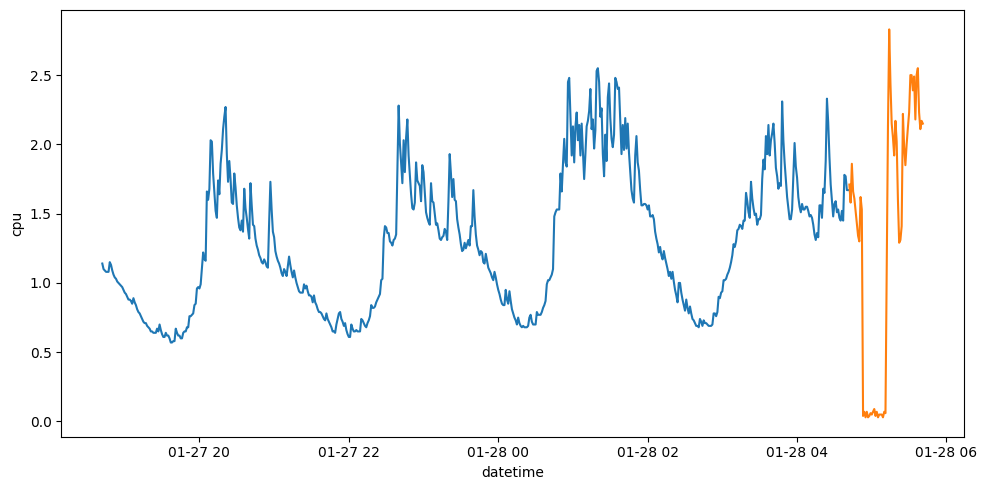

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_train)
sns.lineplot(data = ts_test)

plt.tight_layout()

plt.show()

## Step 2: Construct and analyze the time serie

In [44]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts_train)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                  -3.421625
p-value                          0.010243
#Lags Used                      18.000000
Number of Observations Used    581.000000
Critical Value (1%)             -3.441655
Critical Value (5%)             -2.866527
Critical Value (10%)            -2.569426
dtype: float64

### Serie decomposition

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_train, period = 24)
decomposition

### Trend analysis

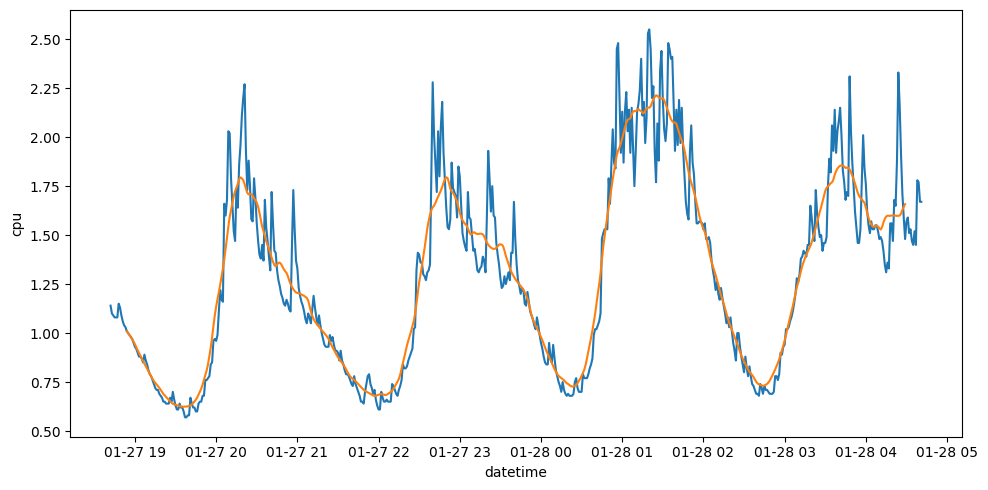

In [46]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_train)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

An upward trend in the data can be appreciated

### Seasonality analysis

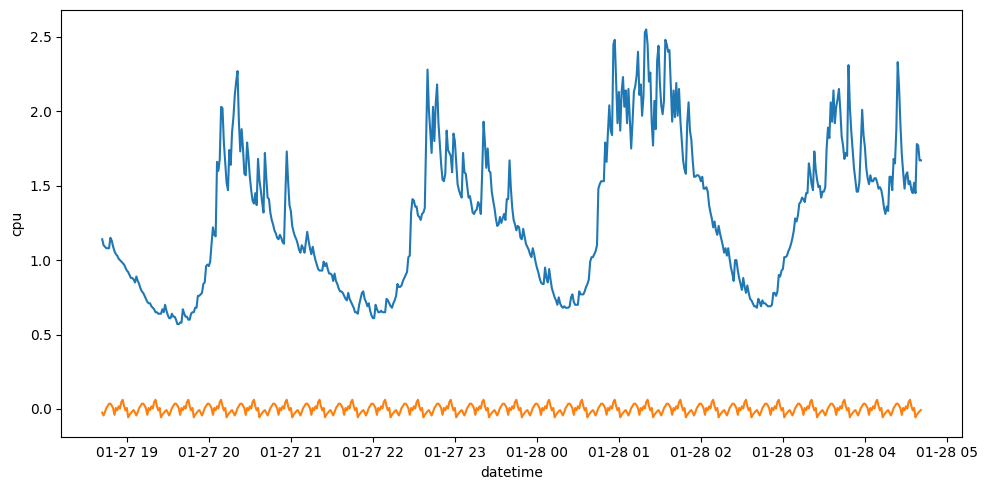

In [47]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_train)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

To evaluate the stationarity of the time series we can apply the so-called **Dickey-Fuller test**, which is a hypothesis test in which the null hypothesis is that the series is stationary, and the alternative is that it is non-stationary:

In [48]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts_train)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                  -3.421625
p-value                          0.010243
#Lags Used                      18.000000
Number of Observations Used    581.000000
Critical Value (1%)             -3.441655
Critical Value (5%)             -2.866527
Critical Value (10%)            -2.569426
dtype: float64

The p-value is less than 0.05, so the series is stationary and does not need to be transformed.

### Variability analysis

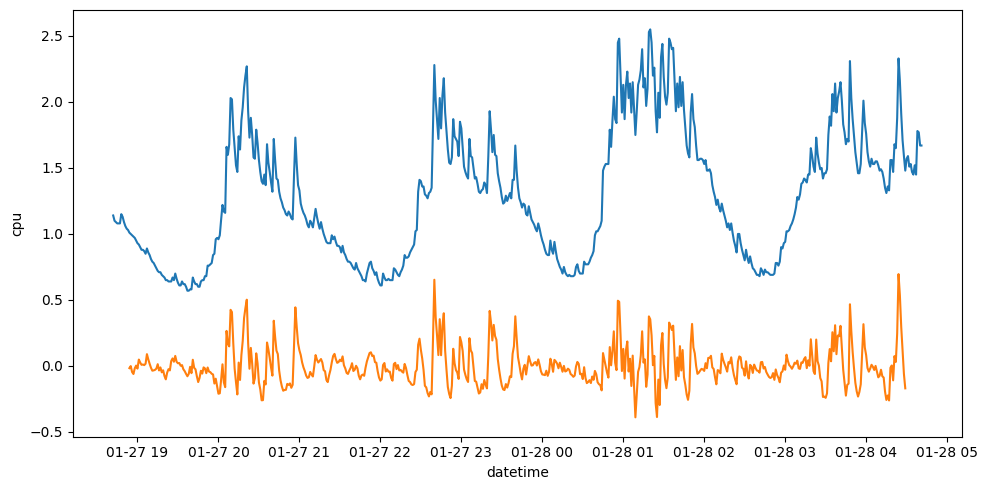

In [49]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_train)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

High variability and presence of debris during periods of high CPU load.

### Autocorrelation analysis

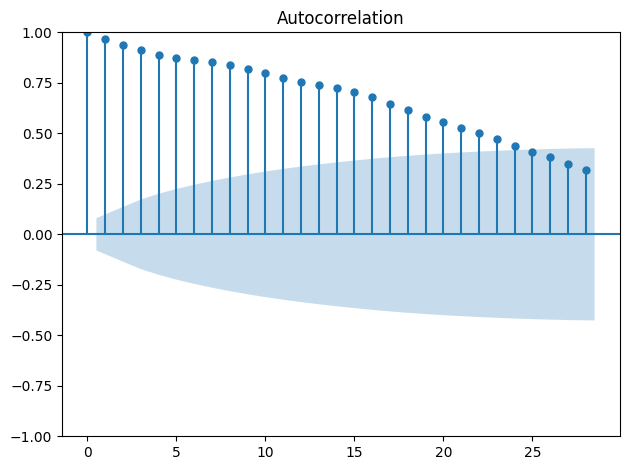

In [50]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts_train)

plt.tight_layout()

plt.show()

As we progress through the time series, the autocorrelation is regularly lost, which hampers the predictive ability of the model.

## Step 3: Train an ARIMA

In [51]:
from pmdarima import auto_arima

model = auto_arima(ts_train, seasonal = True, trace = True, m = 24)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=inf, Time=3.70 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=-812.814, Time=0.11 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=-809.989, Time=0.69 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=-810.139, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=-814.783, Time=0.07 sec
 ARIMA(0,1,0)(1,0,0)[24] intercept   : AIC=-811.059, Time=0.76 sec
 ARIMA(0,1,0)(0,0,1)[24] intercept   : AIC=-811.046, Time=0.98 sec
 ARIMA(0,1,0)(1,0,1)[24] intercept   : AIC=-809.013, Time=0.71 sec
 ARIMA(1,1,0)(0,0,0)[24] intercept   : AIC=-811.743, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[24] intercept   : AIC=-811.910, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[24] intercept   : AIC=inf, Time=0.79 sec

Best model:  ARIMA(0,1,0)(0,0,0)[24]          
Total fit time: 8.774 seconds


The best ARIMA model was $ARIMA(0, 1, 0)$

## Step 4: Predict with the test set

The test set has 60 points, so it should be predicted at 60 future periods.

In [52]:
forecast = model.predict(60)
forecast

2017-01-28 04:42:00    1.67
2017-01-28 04:43:00    1.67
2017-01-28 04:44:00    1.67
2017-01-28 04:45:00    1.67
2017-01-28 04:46:00    1.67
2017-01-28 04:47:00    1.67
2017-01-28 04:48:00    1.67
2017-01-28 04:49:00    1.67
2017-01-28 04:50:00    1.67
2017-01-28 04:51:00    1.67
2017-01-28 04:52:00    1.67
2017-01-28 04:53:00    1.67
2017-01-28 04:54:00    1.67
2017-01-28 04:55:00    1.67
2017-01-28 04:56:00    1.67
2017-01-28 04:57:00    1.67
2017-01-28 04:58:00    1.67
2017-01-28 04:59:00    1.67
2017-01-28 05:00:00    1.67
2017-01-28 05:01:00    1.67
2017-01-28 05:02:00    1.67
2017-01-28 05:03:00    1.67
2017-01-28 05:04:00    1.67
2017-01-28 05:05:00    1.67
2017-01-28 05:06:00    1.67
2017-01-28 05:07:00    1.67
2017-01-28 05:08:00    1.67
2017-01-28 05:09:00    1.67
2017-01-28 05:10:00    1.67
2017-01-28 05:11:00    1.67
2017-01-28 05:12:00    1.67
2017-01-28 05:13:00    1.67
2017-01-28 05:14:00    1.67
2017-01-28 05:15:00    1.67
2017-01-28 05:16:00    1.67
2017-01-28 05:17:00 

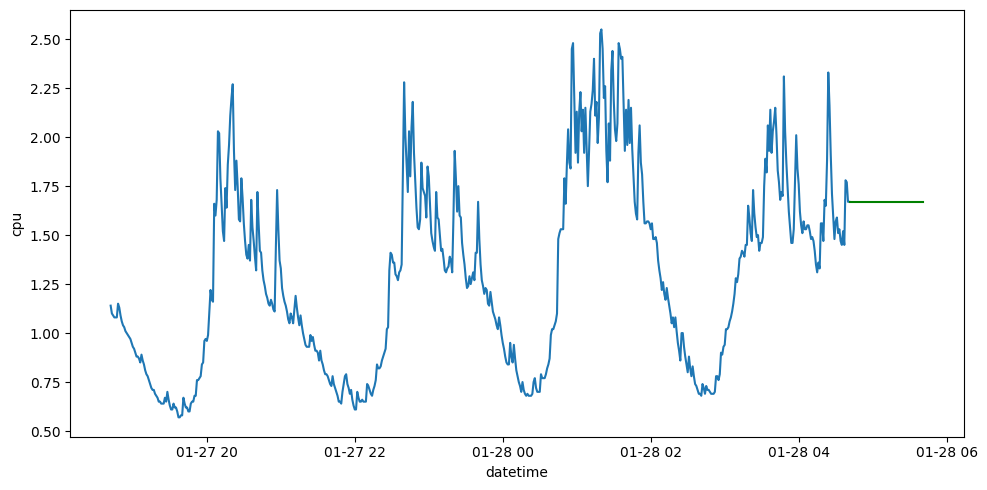

In [53]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_train)
sns.lineplot(data = forecast, c = "green")

plt.tight_layout()

plt.show()

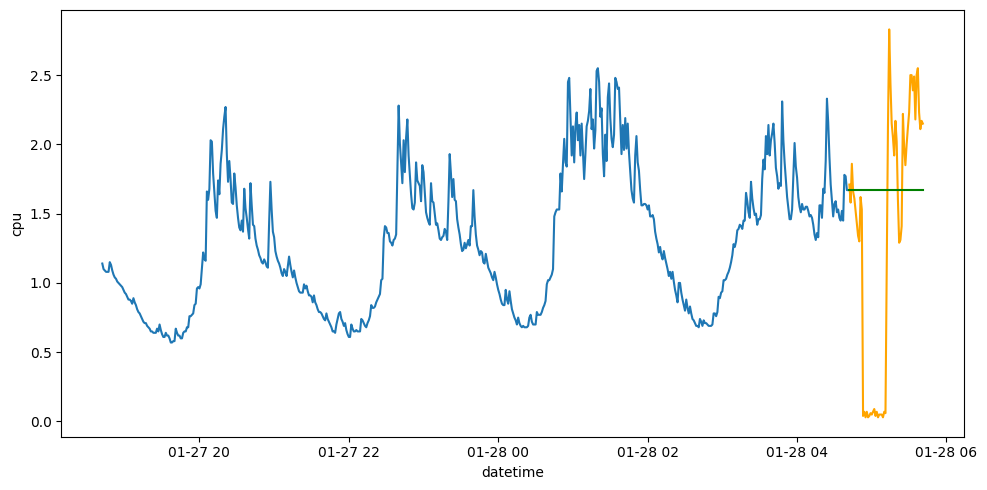

In [54]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_train)
sns.lineplot(data = ts_test, c = "orange")
sns.lineplot(data = forecast, c = "green")

plt.tight_layout()

plt.show()

The data set is inefficient as it is composed of two days of data and due to the variability and trend of the data, the model cannot make accurate predictions. 